In [1]:
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
def sample_from_mog(n, rho, mu1, mu2, sigma1, sigma2):
    choice_vec = np.random.uniform(0, 1, n) > rho
    Z = np.random.normal(0,1, n)
    normal_vec = sigma1*Z + mu1
    return choice_vec*((sigma2-sigma1)*Z+(mu2-mu1)) + normal_vec

In [3]:
rho = 0.4 
mu1 = -2
mu2 = 2
sigma1 = 1
sigma2 = 1

W = sample_from_mog(1000000,rho, mu1, mu2, sigma1, sigma2)

y = np.linspace(-5,5)
p = (rho/(sigma1*np.sqrt(2*np.pi)))*np.exp(-(y-mu1)**2/(2*sigma1**2)) + \
    ((1-rho)/(sigma2*np.sqrt(2*np.pi)))*np.exp(-(y-mu2)**2/(2*sigma2**2)) 
lp = np.log(p)

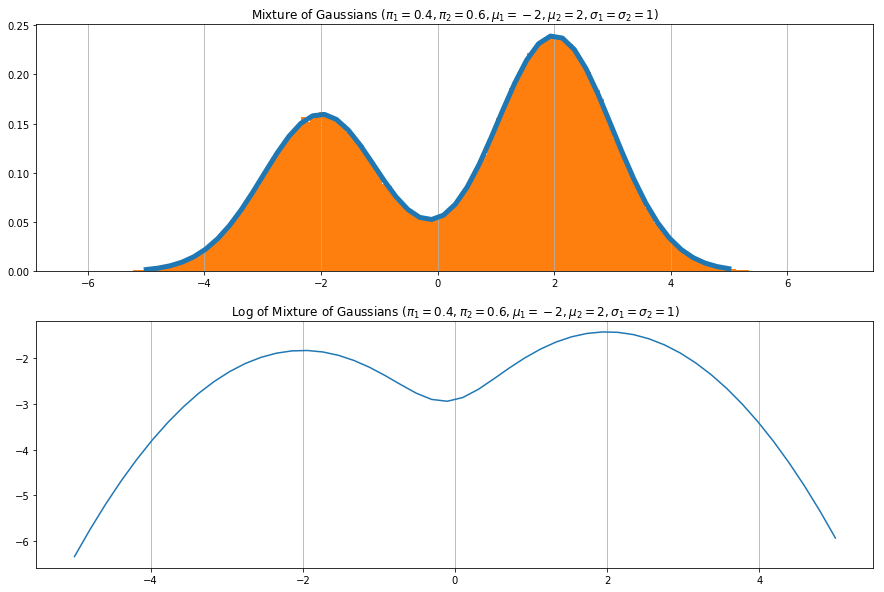

In [31]:
fig, axs = plt.subplots(2, 1,figsize=(15,10))
axs[0].plot(y, p, linewidth=5)
axs[1].plot(y, lp)
axs[0].grid(axis="x")
axs[1].grid(axis="x")
axs[0].title.set_text(r'Mixture of Gaussians ($\pi_1 = 0.4, \pi_2 = 0.6, \mu_1=-2, \mu_2=2, \sigma_1 = \sigma_2 = 1$)')
axs[1].title.set_text(r'Log of Mixture of Gaussians ($\pi_1 = 0.4, \pi_2 = 0.6, \mu_1=-2, \mu_2=2, \sigma_1 = \sigma_2 = 1$)')
s0 = axs[0].hist(W, bins='auto', density=1)

# Maximum Likelihood Estimation of the MoG parameters
Assume that the vector W is sampled from the above MoG and is given to us. We know nothing else other than this vector and the fact that we have a mixture of 2 Gaussians. We want to find the MLE estimate of the 5 parameters above.

## Gradient descent estimation

In [5]:
def compute_grad_wrt_rho(Y, rho, mu1, mu2, sigma1, sigma2):
    num = (1/sigma1)*np.exp(-((Y-mu1)**2)/(2*(sigma1**2))) - (1/sigma2)*np.exp(-((Y-mu2)**2)/(2*sigma2**2))
    denom = ((rho/sigma1)*np.exp(-((Y-mu1)**2)/(2*sigma1**2)) +\
                                  ((1-rho)/sigma2)*np.exp(-((Y-mu2)**2)/(2*sigma2**2)))
    return -np.sum(num/denom)

In [6]:
def compute_grad_wrt_mu1(Y, rho, mu1, mu2, sigma1, sigma2):
    num = (rho/sigma1)*np.exp(-(Y-mu1)**2/(2*sigma1**2))*((Y-mu1)/(sigma1**2))
    denom = ((rho/sigma1)*np.exp(-(Y-mu1)**2/(2*sigma1**2)) +\
                                  ((1-rho)/sigma2)*np.exp(-(Y-mu2)**2/(2*sigma2**2)))
    return -np.sum(num/denom)

In [7]:
def compute_grad_wrt_mu2(Y, rho, mu1, mu2, sigma1, sigma2):
    num = ((1-rho)/sigma2)*np.exp(-(Y-mu2)**2/(2*sigma2**2))*((Y-mu2)/(sigma2**2))
    denom = ((rho/sigma1)*np.exp(-(Y-mu1)**2/(2*sigma1**2)) +\
                                  ((1-rho)/sigma2)*np.exp(-(Y-mu2)**2/(2*sigma2**2)))
    return -np.sum(num/denom)

In [8]:
def compute_grad_wrt_sigma1(Y, rho, mu1, mu2, sigma1, sigma2):
    num = (rho/sigma1**2)*np.exp(-(Y-mu1)**2/(2*sigma1**2))*(((Y-mu1)**2)/(sigma1**2) -1 )
    denom = ((rho/sigma1)*np.exp(-(Y-mu1)**2/(2*sigma1**2)) +\
                                  ((1-rho)/sigma2)*np.exp(-(Y-mu2)**2/(2*sigma2**2)))
    return -np.sum(num/denom)

In [9]:
def compute_grad_wrt_sigma2(Y, rho, mu1, mu2, sigma1, sigma2):
    num = ((1-rho)/sigma2**2)*np.exp(-(Y-mu2)**2/(2*sigma2**2))*(((Y-mu2)**2)/(sigma2**2) - 1)
    denom = ((rho/sigma1)*np.exp(-(Y-mu1)**2/(2*sigma1**2)) +\
                                  ((1-rho)/sigma2)*np.exp(-(Y-mu2)**2/(2*sigma2**2)))
    return -np.sum(num/denom)

In [10]:
def gradient_descent_update_params(Y, rho, mu1, mu2, sigma1, sigma2, learning_rate):
    rho_update = learning_rate * compute_grad_wrt_rho(Y, rho, mu1, mu2, sigma1, sigma2)
    mu1_update = learning_rate * compute_grad_wrt_mu1(Y, rho, mu1, mu2, sigma1, sigma2)
    mu2_update = learning_rate * compute_grad_wrt_mu2(Y, rho, mu1, mu2, sigma1, sigma2)
    sigma1_update = learning_rate * compute_grad_wrt_sigma1(Y, rho, mu1, mu2, sigma1, sigma2)
    sigma2_update = learning_rate * compute_grad_wrt_sigma2(Y, rho, mu1, mu2, sigma1, sigma2)
    
    rho -= rho_update
    mu1 -= mu1_update
    mu2 -= mu2_update
    sigma1 -= sigma1_update
    sigma2 -= sigma2_update
    #print(rho_update, mu1_update, mu2_update, sigma1_update, sigma2_update)
    return rho, mu1, mu2, sigma1, sigma2 

In [24]:
learning_rate = 0.0000001
rho, mu1, mu2, sigma1, sigma2 = 0.5, 0, 1, 2, 2
for _ in range(1000):
    print('rho=', "%.2f" % rho, '\tmu1=', "%.2f" % mu1, '\tmu2=', "%.2f" % mu2, \
          '\tsigma1=', "%.2f" % sigma1, '\tsigma2=', "%.2f" % sigma2)
    rho, mu1, mu2, sigma1, sigma2 = gradient_descent_update_params(W, rho, mu1, mu2, sigma1, sigma2, learning_rate)
    

rho= 0.50 	mu1= 0.00 	mu2= 1.00 	sigma1= 2.00 	sigma2= 2.00
rho= 0.50 	mu1= -0.00 	mu2= 1.00 	sigma1= 2.01 	sigma2= 2.00
rho= 0.50 	mu1= -0.00 	mu2= 1.00 	sigma1= 2.01 	sigma2= 2.00
rho= 0.51 	mu1= -0.01 	mu2= 1.00 	sigma1= 2.02 	sigma2= 2.00
rho= 0.51 	mu1= -0.01 	mu2= 1.00 	sigma1= 2.02 	sigma2= 2.00
rho= 0.51 	mu1= -0.01 	mu2= 1.00 	sigma1= 2.03 	sigma2= 2.00
rho= 0.51 	mu1= -0.01 	mu2= 1.00 	sigma1= 2.03 	sigma2= 2.00
rho= 0.51 	mu1= -0.01 	mu2= 1.00 	sigma1= 2.04 	sigma2= 2.00
rho= 0.51 	mu1= -0.02 	mu2= 1.00 	sigma1= 2.04 	sigma2= 2.00
rho= 0.52 	mu1= -0.02 	mu2= 1.00 	sigma1= 2.05 	sigma2= 2.01
rho= 0.52 	mu1= -0.02 	mu2= 1.00 	sigma1= 2.05 	sigma2= 2.01
rho= 0.52 	mu1= -0.02 	mu2= 1.00 	sigma1= 2.05 	sigma2= 2.01
rho= 0.52 	mu1= -0.02 	mu2= 1.00 	sigma1= 2.06 	sigma2= 2.01
rho= 0.52 	mu1= -0.02 	mu2= 1.00 	sigma1= 2.06 	sigma2= 2.01
rho= 0.52 	mu1= -0.03 	mu2= 1.00 	sigma1= 2.07 	sigma2= 2.01
rho= 0.53 	mu1= -0.03 	mu2= 1.00 	sigma1= 2.07 	sigma2= 2.01
rho= 0.53 	mu1= -0.03 	mu

rho= 0.58 	mu1= -0.12 	mu2= 1.09 	sigma1= 2.23 	sigma2= 1.92
rho= 0.58 	mu1= -0.12 	mu2= 1.09 	sigma1= 2.23 	sigma2= 1.92
rho= 0.58 	mu1= -0.12 	mu2= 1.09 	sigma1= 2.23 	sigma2= 1.92
rho= 0.58 	mu1= -0.12 	mu2= 1.09 	sigma1= 2.23 	sigma2= 1.92
rho= 0.58 	mu1= -0.12 	mu2= 1.09 	sigma1= 2.23 	sigma2= 1.92
rho= 0.58 	mu1= -0.12 	mu2= 1.09 	sigma1= 2.23 	sigma2= 1.92
rho= 0.58 	mu1= -0.12 	mu2= 1.09 	sigma1= 2.23 	sigma2= 1.92
rho= 0.58 	mu1= -0.12 	mu2= 1.09 	sigma1= 2.23 	sigma2= 1.92
rho= 0.58 	mu1= -0.12 	mu2= 1.09 	sigma1= 2.23 	sigma2= 1.92
rho= 0.58 	mu1= -0.12 	mu2= 1.09 	sigma1= 2.23 	sigma2= 1.92
rho= 0.58 	mu1= -0.12 	mu2= 1.10 	sigma1= 2.23 	sigma2= 1.91
rho= 0.58 	mu1= -0.12 	mu2= 1.10 	sigma1= 2.23 	sigma2= 1.91
rho= 0.58 	mu1= -0.12 	mu2= 1.10 	sigma1= 2.23 	sigma2= 1.91
rho= 0.58 	mu1= -0.12 	mu2= 1.10 	sigma1= 2.23 	sigma2= 1.91
rho= 0.58 	mu1= -0.12 	mu2= 1.10 	sigma1= 2.23 	sigma2= 1.91
rho= 0.58 	mu1= -0.12 	mu2= 1.10 	sigma1= 2.23 	sigma2= 1.91
rho= 0.58 	mu1= -0.13 	m

rho= 0.60 	mu1= -0.22 	mu2= 1.28 	sigma1= 2.23 	sigma2= 1.76
rho= 0.60 	mu1= -0.22 	mu2= 1.29 	sigma1= 2.23 	sigma2= 1.76
rho= 0.60 	mu1= -0.22 	mu2= 1.29 	sigma1= 2.23 	sigma2= 1.76
rho= 0.60 	mu1= -0.22 	mu2= 1.29 	sigma1= 2.23 	sigma2= 1.76
rho= 0.60 	mu1= -0.22 	mu2= 1.29 	sigma1= 2.23 	sigma2= 1.75
rho= 0.60 	mu1= -0.22 	mu2= 1.29 	sigma1= 2.23 	sigma2= 1.75
rho= 0.60 	mu1= -0.22 	mu2= 1.30 	sigma1= 2.23 	sigma2= 1.75
rho= 0.60 	mu1= -0.22 	mu2= 1.30 	sigma1= 2.23 	sigma2= 1.75
rho= 0.60 	mu1= -0.22 	mu2= 1.30 	sigma1= 2.23 	sigma2= 1.75
rho= 0.60 	mu1= -0.22 	mu2= 1.30 	sigma1= 2.23 	sigma2= 1.75
rho= 0.60 	mu1= -0.22 	mu2= 1.30 	sigma1= 2.23 	sigma2= 1.74
rho= 0.60 	mu1= -0.23 	mu2= 1.31 	sigma1= 2.23 	sigma2= 1.74
rho= 0.60 	mu1= -0.23 	mu2= 1.31 	sigma1= 2.23 	sigma2= 1.74
rho= 0.60 	mu1= -0.23 	mu2= 1.31 	sigma1= 2.23 	sigma2= 1.74
rho= 0.60 	mu1= -0.23 	mu2= 1.31 	sigma1= 2.23 	sigma2= 1.74
rho= 0.60 	mu1= -0.23 	mu2= 1.31 	sigma1= 2.23 	sigma2= 1.73
rho= 0.60 	mu1= -0.23 	m

rho= 0.61 	mu1= -0.42 	mu2= 1.73 	sigma1= 2.18 	sigma2= 1.31
rho= 0.61 	mu1= -0.42 	mu2= 1.73 	sigma1= 2.17 	sigma2= 1.31
rho= 0.61 	mu1= -0.42 	mu2= 1.74 	sigma1= 2.17 	sigma2= 1.30
rho= 0.61 	mu1= -0.42 	mu2= 1.74 	sigma1= 2.17 	sigma2= 1.29
rho= 0.61 	mu1= -0.43 	mu2= 1.75 	sigma1= 2.17 	sigma2= 1.29
rho= 0.61 	mu1= -0.43 	mu2= 1.76 	sigma1= 2.17 	sigma2= 1.28
rho= 0.61 	mu1= -0.43 	mu2= 1.76 	sigma1= 2.17 	sigma2= 1.27
rho= 0.61 	mu1= -0.43 	mu2= 1.77 	sigma1= 2.17 	sigma2= 1.27
rho= 0.61 	mu1= -0.44 	mu2= 1.77 	sigma1= 2.17 	sigma2= 1.26
rho= 0.61 	mu1= -0.44 	mu2= 1.78 	sigma1= 2.17 	sigma2= 1.25
rho= 0.61 	mu1= -0.44 	mu2= 1.78 	sigma1= 2.16 	sigma2= 1.25
rho= 0.61 	mu1= -0.44 	mu2= 1.79 	sigma1= 2.16 	sigma2= 1.24
rho= 0.61 	mu1= -0.45 	mu2= 1.79 	sigma1= 2.16 	sigma2= 1.23
rho= 0.61 	mu1= -0.45 	mu2= 1.80 	sigma1= 2.16 	sigma2= 1.23
rho= 0.61 	mu1= -0.45 	mu2= 1.81 	sigma1= 2.16 	sigma2= 1.22
rho= 0.61 	mu1= -0.46 	mu2= 1.81 	sigma1= 2.16 	sigma2= 1.21
rho= 0.61 	mu1= -0.46 	m

rho= 0.58 	mu1= -0.78 	mu2= 2.26 	sigma1= 1.94 	sigma2= 0.82
rho= 0.58 	mu1= -0.79 	mu2= 2.26 	sigma1= 1.94 	sigma2= 0.82
rho= 0.58 	mu1= -0.79 	mu2= 2.26 	sigma1= 1.94 	sigma2= 0.82
rho= 0.58 	mu1= -0.79 	mu2= 2.26 	sigma1= 1.94 	sigma2= 0.82
rho= 0.58 	mu1= -0.79 	mu2= 2.26 	sigma1= 1.94 	sigma2= 0.82
rho= 0.58 	mu1= -0.79 	mu2= 2.26 	sigma1= 1.93 	sigma2= 0.82
rho= 0.58 	mu1= -0.80 	mu2= 2.26 	sigma1= 1.93 	sigma2= 0.82
rho= 0.58 	mu1= -0.80 	mu2= 2.26 	sigma1= 1.93 	sigma2= 0.82
rho= 0.58 	mu1= -0.80 	mu2= 2.26 	sigma1= 1.93 	sigma2= 0.82
rho= 0.58 	mu1= -0.80 	mu2= 2.27 	sigma1= 1.93 	sigma2= 0.82
rho= 0.58 	mu1= -0.81 	mu2= 2.27 	sigma1= 1.92 	sigma2= 0.82
rho= 0.58 	mu1= -0.81 	mu2= 2.27 	sigma1= 1.92 	sigma2= 0.82
rho= 0.58 	mu1= -0.81 	mu2= 2.27 	sigma1= 1.92 	sigma2= 0.82
rho= 0.58 	mu1= -0.81 	mu2= 2.27 	sigma1= 1.92 	sigma2= 0.82
rho= 0.58 	mu1= -0.82 	mu2= 2.27 	sigma1= 1.92 	sigma2= 0.82
rho= 0.58 	mu1= -0.82 	mu2= 2.27 	sigma1= 1.92 	sigma2= 0.82
rho= 0.58 	mu1= -0.82 	m

rho= 0.52 	mu1= -1.14 	mu2= 2.25 	sigma1= 1.68 	sigma2= 0.86
rho= 0.52 	mu1= -1.14 	mu2= 2.25 	sigma1= 1.68 	sigma2= 0.86
rho= 0.52 	mu1= -1.15 	mu2= 2.25 	sigma1= 1.67 	sigma2= 0.86
rho= 0.52 	mu1= -1.15 	mu2= 2.25 	sigma1= 1.67 	sigma2= 0.86
rho= 0.52 	mu1= -1.15 	mu2= 2.25 	sigma1= 1.67 	sigma2= 0.86
rho= 0.52 	mu1= -1.16 	mu2= 2.25 	sigma1= 1.67 	sigma2= 0.86
rho= 0.52 	mu1= -1.16 	mu2= 2.25 	sigma1= 1.67 	sigma2= 0.86
rho= 0.52 	mu1= -1.16 	mu2= 2.24 	sigma1= 1.66 	sigma2= 0.86
rho= 0.52 	mu1= -1.16 	mu2= 2.24 	sigma1= 1.66 	sigma2= 0.86
rho= 0.52 	mu1= -1.17 	mu2= 2.24 	sigma1= 1.66 	sigma2= 0.86
rho= 0.52 	mu1= -1.17 	mu2= 2.24 	sigma1= 1.66 	sigma2= 0.86
rho= 0.52 	mu1= -1.17 	mu2= 2.24 	sigma1= 1.65 	sigma2= 0.86
rho= 0.51 	mu1= -1.18 	mu2= 2.24 	sigma1= 1.65 	sigma2= 0.86
rho= 0.51 	mu1= -1.18 	mu2= 2.24 	sigma1= 1.65 	sigma2= 0.86
rho= 0.51 	mu1= -1.18 	mu2= 2.24 	sigma1= 1.65 	sigma2= 0.87
rho= 0.51 	mu1= -1.19 	mu2= 2.24 	sigma1= 1.64 	sigma2= 0.87
rho= 0.51 	mu1= -1.19 	m

rho= 0.45 	mu1= -1.58 	mu2= 2.15 	sigma1= 1.32 	sigma2= 0.91
rho= 0.45 	mu1= -1.59 	mu2= 2.15 	sigma1= 1.32 	sigma2= 0.91
rho= 0.45 	mu1= -1.59 	mu2= 2.15 	sigma1= 1.32 	sigma2= 0.91
rho= 0.45 	mu1= -1.59 	mu2= 2.14 	sigma1= 1.31 	sigma2= 0.91
rho= 0.45 	mu1= -1.60 	mu2= 2.14 	sigma1= 1.31 	sigma2= 0.91
rho= 0.45 	mu1= -1.60 	mu2= 2.14 	sigma1= 1.31 	sigma2= 0.91
rho= 0.45 	mu1= -1.60 	mu2= 2.14 	sigma1= 1.30 	sigma2= 0.91
rho= 0.45 	mu1= -1.61 	mu2= 2.14 	sigma1= 1.30 	sigma2= 0.91
rho= 0.45 	mu1= -1.61 	mu2= 2.14 	sigma1= 1.30 	sigma2= 0.91
rho= 0.45 	mu1= -1.61 	mu2= 2.14 	sigma1= 1.30 	sigma2= 0.91
rho= 0.45 	mu1= -1.62 	mu2= 2.14 	sigma1= 1.29 	sigma2= 0.91
rho= 0.45 	mu1= -1.62 	mu2= 2.14 	sigma1= 1.29 	sigma2= 0.91
rho= 0.45 	mu1= -1.62 	mu2= 2.14 	sigma1= 1.29 	sigma2= 0.91
rho= 0.45 	mu1= -1.63 	mu2= 2.13 	sigma1= 1.29 	sigma2= 0.91
rho= 0.44 	mu1= -1.63 	mu2= 2.13 	sigma1= 1.28 	sigma2= 0.92
rho= 0.44 	mu1= -1.63 	mu2= 2.13 	sigma1= 1.28 	sigma2= 0.92
rho= 0.44 	mu1= -1.64 	m

rho= 0.41 	mu1= -1.92 	mu2= 2.03 	sigma1= 1.05 	sigma2= 0.97
rho= 0.41 	mu1= -1.92 	mu2= 2.03 	sigma1= 1.05 	sigma2= 0.97
rho= 0.41 	mu1= -1.92 	mu2= 2.03 	sigma1= 1.05 	sigma2= 0.98
rho= 0.41 	mu1= -1.93 	mu2= 2.03 	sigma1= 1.05 	sigma2= 0.98
rho= 0.41 	mu1= -1.93 	mu2= 2.03 	sigma1= 1.05 	sigma2= 0.98
rho= 0.41 	mu1= -1.93 	mu2= 2.03 	sigma1= 1.05 	sigma2= 0.98
rho= 0.41 	mu1= -1.93 	mu2= 2.03 	sigma1= 1.04 	sigma2= 0.98
rho= 0.41 	mu1= -1.93 	mu2= 2.03 	sigma1= 1.04 	sigma2= 0.98
rho= 0.41 	mu1= -1.93 	mu2= 2.03 	sigma1= 1.04 	sigma2= 0.98
rho= 0.41 	mu1= -1.93 	mu2= 2.03 	sigma1= 1.04 	sigma2= 0.98
rho= 0.41 	mu1= -1.93 	mu2= 2.03 	sigma1= 1.04 	sigma2= 0.98
rho= 0.41 	mu1= -1.93 	mu2= 2.03 	sigma1= 1.04 	sigma2= 0.98
rho= 0.41 	mu1= -1.94 	mu2= 2.03 	sigma1= 1.04 	sigma2= 0.98
rho= 0.41 	mu1= -1.94 	mu2= 2.03 	sigma1= 1.04 	sigma2= 0.98
rho= 0.41 	mu1= -1.94 	mu2= 2.03 	sigma1= 1.04 	sigma2= 0.98
rho= 0.41 	mu1= -1.94 	mu2= 2.03 	sigma1= 1.04 	sigma2= 0.98
rho= 0.41 	mu1= -1.94 	m

In [29]:
print("ML estimation of the parameters though gradient descent after 1000 iterations:")
print('rho=', "%.4f" % rho, '\tmu1=', "%.4f" % mu1, '\tmu2=', "%.4f" % mu2, \
          '\tsigma1=', "%.4f" % sigma1, '\tsigma2=', "%.4f" % sigma2)

ML estimation of the parameters though gradient descent after 1000 iterations:
rho= 0.4035 	mu1= -1.9660 	mu2= 2.0155 	sigma1= 1.0199 	sigma2= 0.9876


## EM algorithm estimation

In [44]:
def compute_gaussian(y, mu, sigma):
    return (1/(sigma * np.sqrt(2*np.pi)))*np.exp(-(1/(2*sigma**2))*(y-mu)**2)

In [71]:
def E_Step_compute_gamma(rho, mu1, sigma1, mu2, sigma2, y):
    s1 = rho*compute_gaussian(y, mu1, sigma1) 
    s2 = (1-rho)*compute_gaussian(y, mu2, sigma2)
    return np.array([s1/(s1+s2), s2/(s1+s2)])

In [87]:
def M_Step_update_parameters(gammaMat, y):
    N1 = np.sum(gammaMat[0,:])
    N2 = np.sum(gammaMat[1,:])
    rho = N1/gammaMat.shape[1]
    mu1 = (1/N1)*np.sum(gammaMat[0,:] * y) 
    mu2 = (1/N2)*np.sum(gammaMat[1,:] * y) 
    sigma1 = np.sqrt((1/N1)*np.sum(gammaMat[0,:] * (y - mu1)**2))
    sigma2 = np.sqrt((1/N2)*np.sum(gammaMat[1,:] * (y - mu2)**2))
    return rho, mu1, sigma1, mu2, sigma2

In [103]:
rho, mu1, mu2, sigma1, sigma2 = 0.5, 0, 1, 2, 2
for _ in range(50):
    print('rho=', "%.2f" % rho, '\tmu1=', "%.2f" % mu1, '\tmu2=', "%.2f" % mu2, \
          '\tsigma1=', "%.2f" % sigma1, '\tsigma2=', "%.2f" % sigma2)
    gammaMat = E_Step_compute_gamma(rho, mu1, sigma1, mu2, sigma2, W)
    rho, mu1, sigma1, mu2, sigma2 = M_Step_update_parameters(gammaMat, W)

rho= 0.50 	mu1= 0.00 	mu2= 1.00 	sigma1= 2.00 	sigma2= 2.00
rho= 0.50 	mu1= -0.17 	mu2= 0.98 	sigma1= 2.20 	sigma2= 2.03
rho= 0.51 	mu1= -0.21 	mu2= 1.02 	sigma1= 2.23 	sigma2= 1.98
rho= 0.51 	mu1= -0.26 	mu2= 1.08 	sigma1= 2.23 	sigma2= 1.94
rho= 0.51 	mu1= -0.32 	mu2= 1.15 	sigma1= 2.23 	sigma2= 1.90
rho= 0.51 	mu1= -0.39 	mu2= 1.23 	sigma1= 2.22 	sigma2= 1.85
rho= 0.51 	mu1= -0.48 	mu2= 1.33 	sigma1= 2.20 	sigma2= 1.78
rho= 0.52 	mu1= -0.58 	mu2= 1.45 	sigma1= 2.17 	sigma2= 1.69
rho= 0.52 	mu1= -0.69 	mu2= 1.59 	sigma1= 2.13 	sigma2= 1.57
rho= 0.53 	mu1= -0.82 	mu2= 1.75 	sigma1= 2.06 	sigma2= 1.41
rho= 0.53 	mu1= -0.97 	mu2= 1.93 	sigma1= 1.96 	sigma2= 1.22
rho= 0.52 	mu1= -1.12 	mu2= 2.07 	sigma1= 1.84 	sigma2= 1.04
rho= 0.51 	mu1= -1.26 	mu2= 2.16 	sigma1= 1.70 	sigma2= 0.94
rho= 0.50 	mu1= -1.37 	mu2= 2.20 	sigma1= 1.58 	sigma2= 0.90
rho= 0.49 	mu1= -1.47 	mu2= 2.20 	sigma1= 1.48 	sigma2= 0.89
rho= 0.48 	mu1= -1.56 	mu2= 2.18 	sigma1= 1.39 	sigma2= 0.89
rho= 0.46 	mu1= -1.64 	mu

In [104]:
print("ML estimation of the parameters though EM algorithm after only 50 iterations:")
print('rho=', "%.4f" % rho, '\tmu1=', "%.4f" % mu1, '\tmu2=', "%.4f" % mu2, \
          '\tsigma1=', "%.4f" % sigma1, '\tsigma2=', "%.4f" % sigma2)

ML estimation of the parameters though EM algorithm after only 50 iterations:
rho= 0.3998 	mu1= -1.9989 	mu2= 1.9994 	sigma1= 0.9996 	sigma2= 0.9988


Interesting note is that EM algorithm converges much faster but it does not seem to be able to improve further above this point even if we train for a lot more steps (like a 1000).